In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets


# load dataset

In [32]:
df = pd.read_excel('/content/drive/MyDrive/dataset1/1688639662_ausapparalsales4thqrt2020.xlsx')

In [33]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [34]:
# data set shape

df.shape

(7560, 6)

In [35]:
# data set data types

df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

# treatment null values

In [36]:
# null values

print(df.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


# normalizatio of dataset

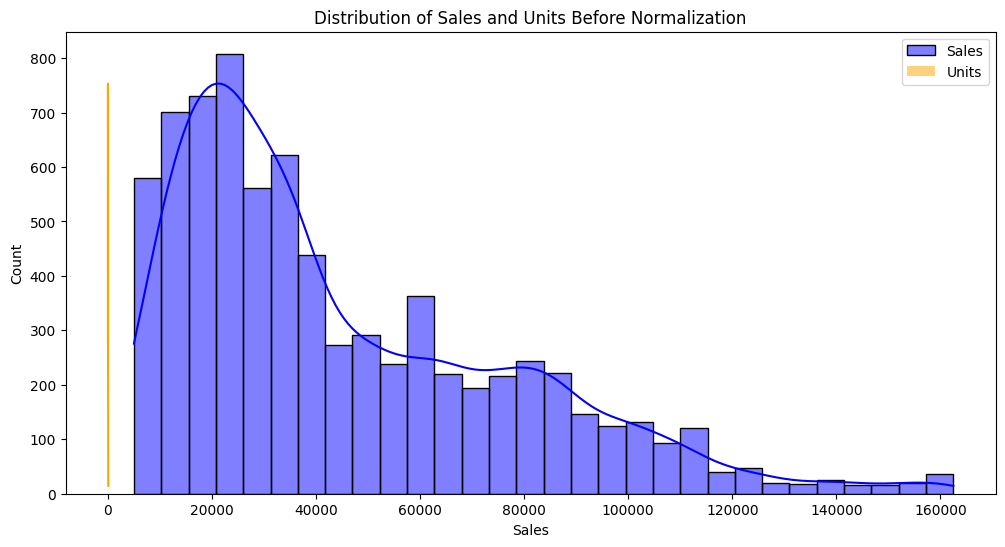

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue', label='Sales')
sns.histplot(df['Unit'], bins=30, kde=True, color='orange', label='Units')
plt.title('Distribution of Sales and Units Before Normalization')
plt.legend()
plt.show()

 As we can see, the distribution is asymmetric to the left, with most of the data on the left side, but we also have some very large values compared to others, which could hinder our analyses.

lets treat outliers first

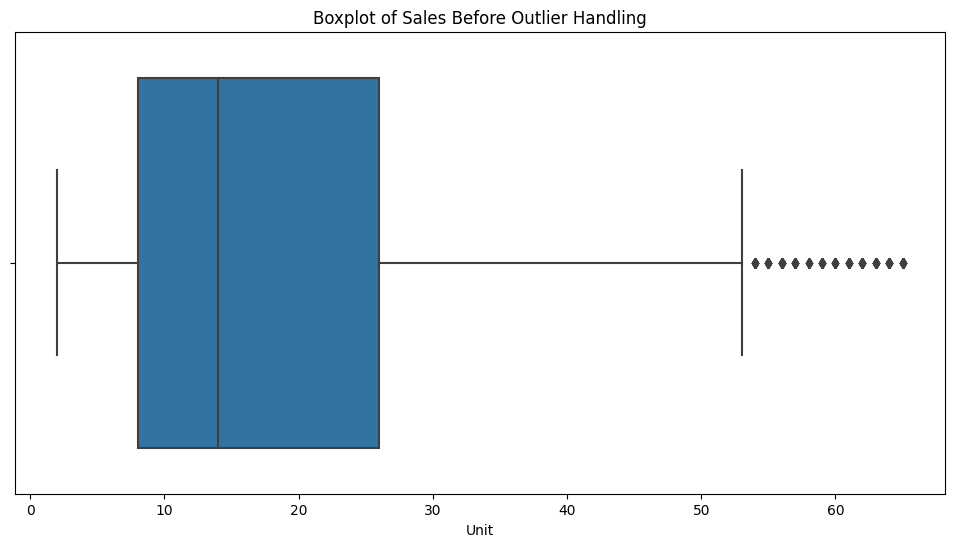

In [38]:
# Visualize boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Unit'])
plt.title('Boxplot of Sales Before Outlier Handling')
plt.show()

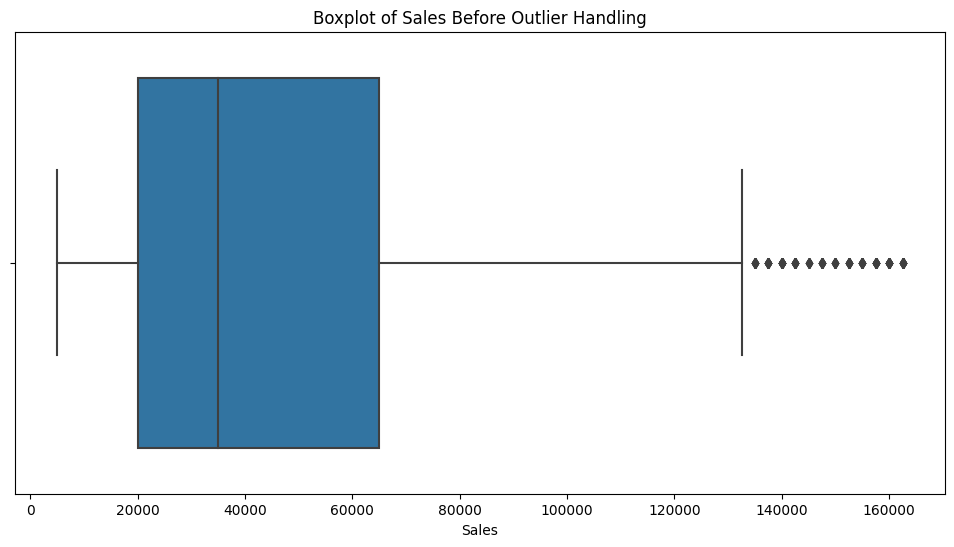

In [39]:
# Visualize boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales Before Outlier Handling')
plt.show()

lests treat the outliers

In [40]:
Q1 = df['Sales'].quantile(0.32)
Q3 = df['Sales'].quantile(0.68)
IQR = Q3 - Q1

In [41]:
Q2 = df['Unit'].quantile(0.5)
Q4 = df['Unit'].quantile(0.75)
IQR2 = Q4 - Q2

In [42]:
df_new = df[(df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 * IQR)]

In [43]:
df_new = df[(df['Unit'] >= Q2 - 1.5 * IQR2) & (df['Unit'] <= Q4 + 1.5 * IQR2)]

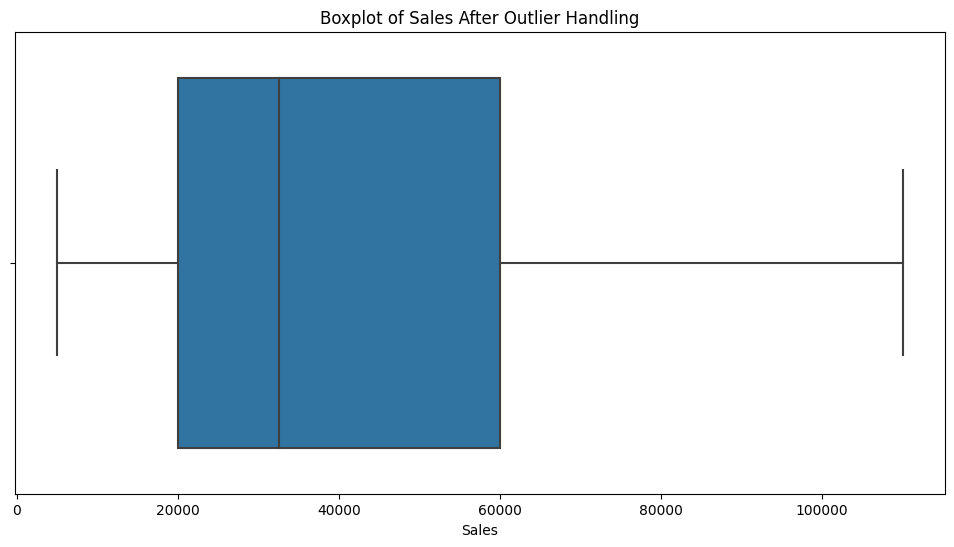

In [44]:
# Visualize boxplot after outlier handling
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_new['Sales'])
plt.title('Boxplot of Sales After Outlier Handling')
plt.show()

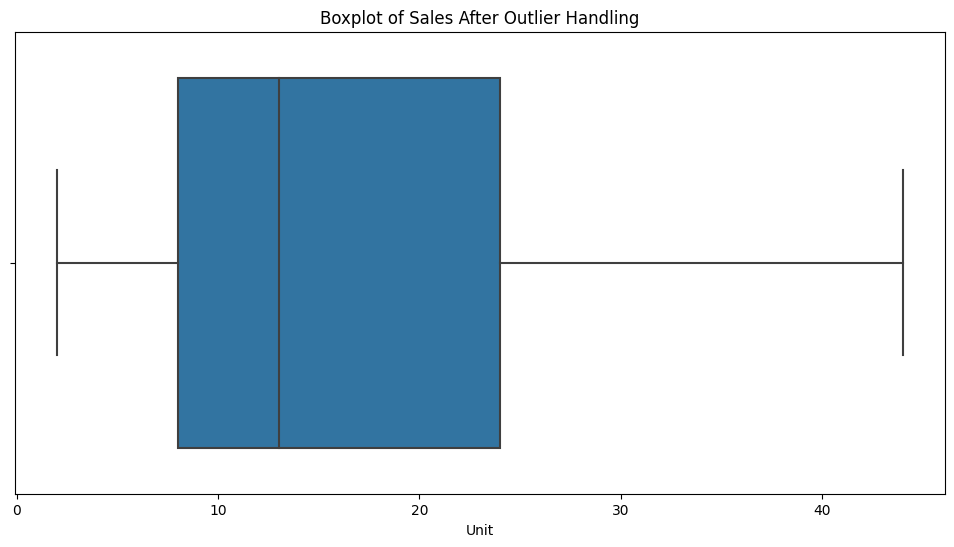

In [45]:
# Visualize boxplot after outlier handling
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_new['Unit'])
plt.title('Boxplot of Sales After Outlier Handling')
plt.show()

now normalization numeric datas

In [46]:
df_new['Sales_normalized'] = (df_new['Sales'] - df_new['Sales'].mean()) / df_new['Sales'].std()
df_new['Units_normalized'] = (df_new['Unit'] - df_new['Unit'].mean()) / df_new['Unit'].std()

<ipython-input-46-ce52a021c945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Sales_normalized'] = (df_new['Sales'] - df_new['Sales'].mean()) / df_new['Sales'].std()
<ipython-input-46-ce52a021c945>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Units_normalized'] = (df_new['Unit'] - df_new['Unit'].mean()) / df_new['Unit'].std()


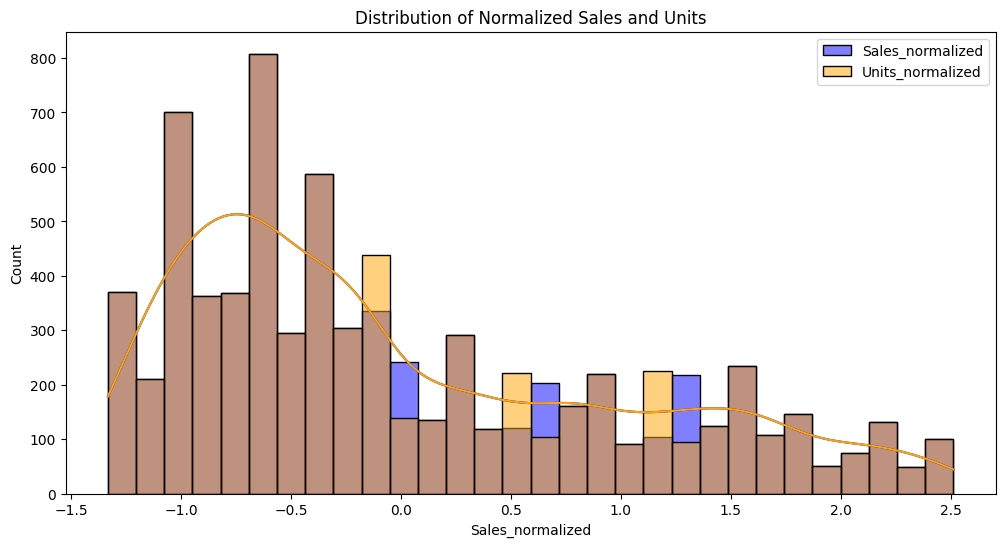

In [47]:
# Visualize the distribution of normalized Sales and Units
plt.figure(figsize=(12, 6))
sns.histplot(df_new['Sales_normalized'], bins=30, kde=True, color='blue', label='Sales_normalized')
sns.histplot(df_new['Units_normalized'], bins=30, kde=True, color='orange', label='Units_normalized')
plt.title('Distribution of Normalized Sales and Units')
plt.legend()
plt.show()

# data analysis

●	Perform descriptive statistical analysis on the data (Sales and Unit columns)

In [48]:
sales_stats = df_new['Sales'].describe()

# Calculate mode separately as it can return multiple modes
sales_mode = df_new['Sales'].mode()

# Descriptive statistical analysis for 'Units' column
units_stats = df_new['Unit'].describe()

# Calculate mode separately for 'Units'
units_mode = df_new['Unit'].mode()

In [49]:
print("Descriptive Statistics for Sales:")
print(sales_stats)
print(f"Mode for Sales: {sales_mode.to_list()}")

print("\nDescriptive Statistics for Units:")
print(units_stats)
print(f"Mode for Units: {units_mode.to_list()}")

Descriptive Statistics for Sales:
count      7257.000000
mean      41391.759680
std       27304.590957
min        5000.000000
25%       20000.000000
50%       32500.000000
75%       60000.000000
max      110000.000000
Name: Sales, dtype: float64
Mode for Sales: [22500]

Descriptive Statistics for Units:
count    7257.000000
mean       16.556704
std        10.921836
min         2.000000
25%         8.000000
50%        13.000000
75%        24.000000
max        44.000000
Name: Unit, dtype: float64
Mode for Units: [9]


●	Determine which group is generating the highest sales, and which group is generating the lowest sales.

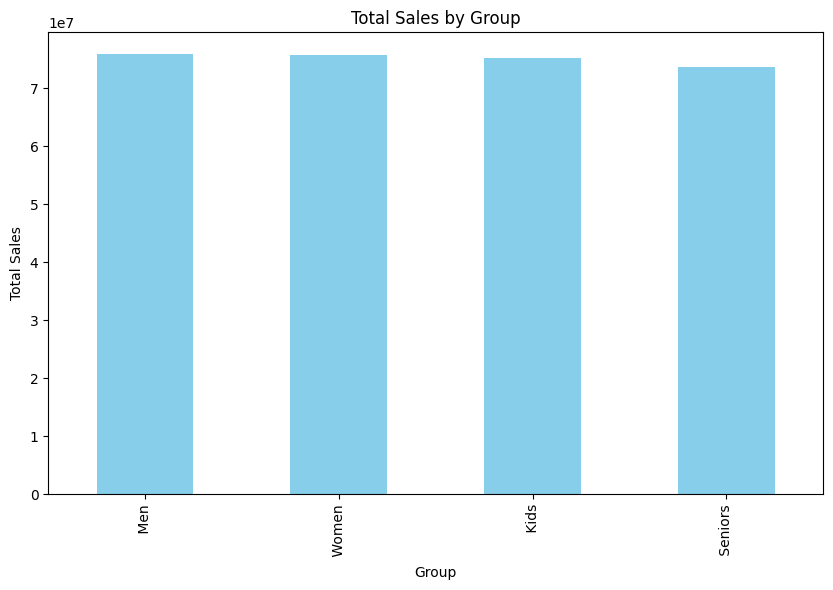

In [50]:
# Group by 'Group' and calculate total sales for each group
group_sales = df_new.groupby('Group')['Sales'].sum()

plt.figure(figsize=(10, 6))
group_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Sales by Group')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.show()

In [51]:
# Find the group with the highest sales
highest_sales_group = group_sales.idxmax()
highest_sales_amount = group_sales.max()

# Find the group with the lowest sales
lowest_sales_group = group_sales.idxmin()
lowest_sales_amount = group_sales.min()

# Print the results
print(f"Group generating the highest sales: {highest_sales_group} with sales amount: {highest_sales_amount}")
print(f"Group generating the lowest sales: {lowest_sales_group} with sales amount: {lowest_sales_amount}")

Group generating the highest sales:  Men with sales amount: 75850000
Group generating the lowest sales:  Seniors with sales amount: 73692500


●	Determine which state is generating the highest sales, and which state is generating the lowest sales.

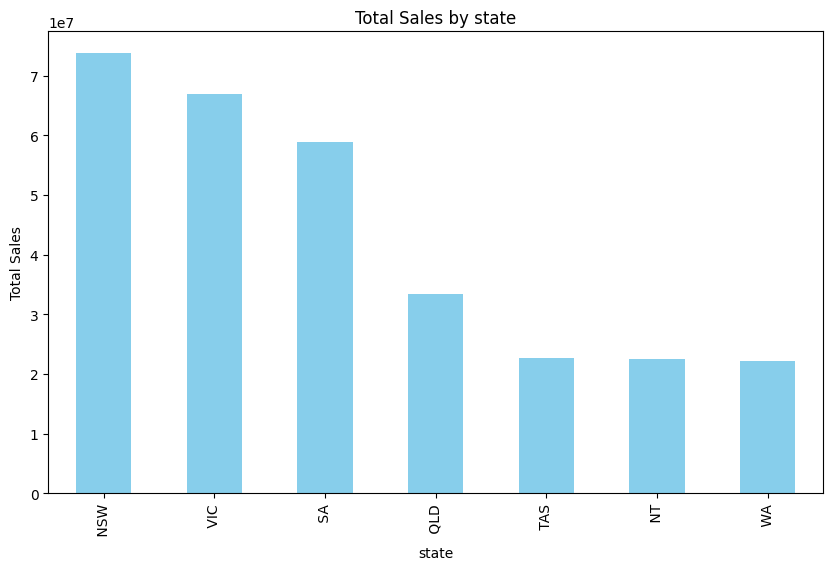

In [52]:
state_sales = df_new.groupby('State')['Sales'].sum()

plt.figure(figsize=(10, 6))
state_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Sales by state')
plt.xlabel('state')
plt.ylabel('Total Sales')
plt.show()

In [53]:
# Find the state with the highest sales
highest_sales_state = state_sales.idxmax()
highest_sales_amount = state_sales.max()

# Find the state with the lowest sales
lowest_sales_state = state_sales.idxmin()
lowest_sales_amount = state_sales.min()

In [54]:
print(f"State generating the highest sales: {highest_sales_state} with sales amount: {highest_sales_amount}")
print(f"State generating the lowest sales: {lowest_sales_state} with sales amount: {lowest_sales_amount}")

State generating the highest sales:  NSW with sales amount: 73732500
State generating the lowest sales:  WA with sales amount: 22152500


●	Generate weekly, monthly and quarterly reports for the analysis made.

In [55]:
df_new = df_new.set_index('Date')

In [57]:

# Generate daily, weekly, monthly, and quarterly reports for df_new
daily_report_new = df_new.resample('D').sum()
weekly_report_new = df_new.resample('W-Mon').sum().groupby(pd.Grouper(freq='W-Mon')).sum()
monthly_report_new = df_new.resample('M').sum().groupby(pd.Grouper(freq='M')).sum()
quarterly_report_new = df_new.resample('Q').sum().groupby(pd.Grouper(freq='Q')).sum()

<ipython-input-57-f676e456764f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_report_new = df_new.resample('D').sum()
<ipython-input-57-f676e456764f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_report_new = df_new.resample('W-Mon').sum().groupby(pd.Grouper(freq='W-Mon')).sum()
<ipython-input-57-f676e456764f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_report_new = df_new.resample('M').su

In [59]:
print("daily Report:")
print(daily_report_new)

print("Weekly Report:")
print(weekly_report_new)

print("\nMonthly Report:")
print(monthly_report_new)

print("\nQuarterly Report:")
print(quarterly_report_new)

daily Report:
            Unit    Sales  Sales_normalized  Units_normalized
Date                                                         
2020-10-01  1389  3472500          2.870422          2.870422
2020-10-02  1346  3365000          0.449282          0.449282
2020-10-03  1365  3412500          3.704843          3.704843
2020-10-04  1442  3605000          6.207159          6.207159
2020-10-05  1545  3862500         14.121881         14.121881
...          ...      ...               ...               ...
2020-12-26  1347  3367500         11.152329         11.152329
2020-12-27  1411  3527500         13.980296         13.980296
2020-12-28  1334  3335000          8.446126          8.446126
2020-12-29  1368  3420000         11.559156         11.559156
2020-12-30  1569  3922500         23.898947         23.898947

[91 rows x 4 columns]
Weekly Report:
             Unit     Sales  Sales_normalized  Units_normalized
Date                                                           
2020-10-05   7

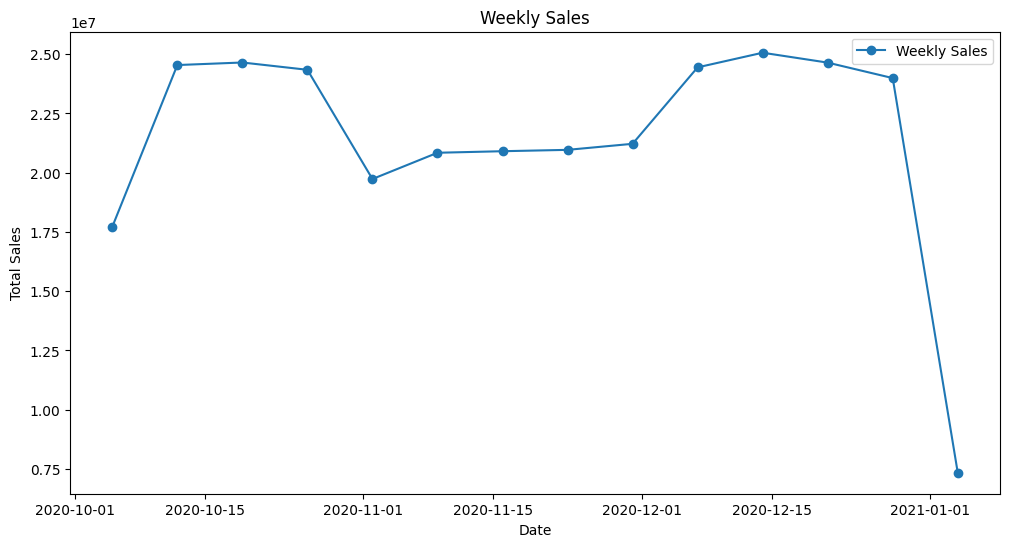

In [61]:
# Plotting weekly sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_report_new['Sales'], marker='o', label='Weekly Sales')
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


# 3.	Data Visualization

In [62]:
# Group by 'State' and 'Group' and calculate total sales
state_group_sales = df_new.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Group by 'Group' and 'State' and calculate total sales
group_state_sales = df_new.groupby(['Group', 'State'])['Sales'].sum().reset_index()

#group by time of day
group_time_sales = df_new.groupby('Time')['Sales'].sum().reset_index()


○	State-wise sales analysis for different groups (kids, women, men, and seniors)

○	Group-wise sales analysis (kids, women, men, and seniors) across different states.

○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?

# In this context I decided to use Ploty because it seemed much more interactive for the end user

In [63]:
group_time_sales = df_new.groupby('Time')['Sales'].sum().reset_index()

In [64]:
# Assuming df_new is your DataFrame with a 'Date' column in datetime format
df_new = df.set_index('Date')



<ipython-input-64-65e66b4012ca>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_report = df_new.resample('W').sum()
<ipython-input-64-65e66b4012ca>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_report = df_new.resample('M').sum()
<ipython-input-64-65e66b4012ca>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_report = df_new.resample('Q').sum()


In [69]:

# Plot state-wise sales analysis for different groups
fig1 = px.bar(state_group_sales, x='State', y='Sales', color='Group',
              title='State-wise Sales Analysis for Different Groups')

# Plot group-wise sales analysis across different states
fig2 = px.bar(group_state_sales, x='Group', y='Sales', color='State',
              title='Group-wise Sales Analysis Across Different States',
              labels={'Group': 'Customer Group', 'Sales': 'Total Sales'})

# Plot time-of-the-day analysis
fig3 = px.line(group_time_sales, x='Time', y='Sales', markers=True,
               title='Total Sales Across Different Times in Subset',
               labels={'Time': 'Time of the Day', 'Sales': 'Total Sales'})

# Create line charts using Plotly Express
fig4 = px.line(daily_report_new, x=daily_report_new.index, y='Sales',
               title='Sales Over Time', labels={'Sales': 'Total Sales', 'x': 'Date'})

fig4.add_scatter(x=weekly_report_new.index, y=weekly_report_new['Sales'],
                 mode='lines+markers', name='Weekly Sales', line=dict(color='orange'))

fig4.add_scatter(x=monthly_report_new.index, y=monthly_report_new['Sales'],
                 mode='lines+markers', name='Monthly Sales', line=dict(color='green'))

fig4.add_scatter(x=quarterly_report_new.index, y=quarterly_report_new['Sales'],
                 mode='lines+markers', name='Quarterly Sales', line=dict(color='red'))

# Update layout for better spacing
fig1.update_layout(height=500, width=600)
fig2.update_layout(height=500, width=600)
fig3.update_layout(height=500, width=600)
fig4.update_layout(height=500, width=600)


fig4.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.75,
            y=1.2,
            showactive=False,
            buttons=[
                dict(label="All",
                     method="relayout",
                     args=["xaxis", {"range": ["2020-10-01", "2020-12-31"]}]),
                dict(label="1m",
                     method="relayout",
                     args=["xaxis", {"range": ["2020-10-01", "2020-11-01"]}]),
                dict(label="3m",
                     method="relayout",
                     args=["xaxis", {"range": ["2020-10-01", "2021-01-01"]}]),
            ],
        )
    ]
)
# Show the interactive dashboard
fig1.show()
fig2.show()
fig3.show()
fig4.show()